In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# ForestFire DataSet

In [2]:
df= pd.read_csv('forestfires.csv')
df.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(517, 31)

In [7]:
df = df.drop(["month", "day"], axis = 1)
df.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
le= LabelEncoder()

df["size_category"] = le.fit_transform(df["size_category"])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [9]:
df.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

<Axes: xlabel='size_category', ylabel='Density'>

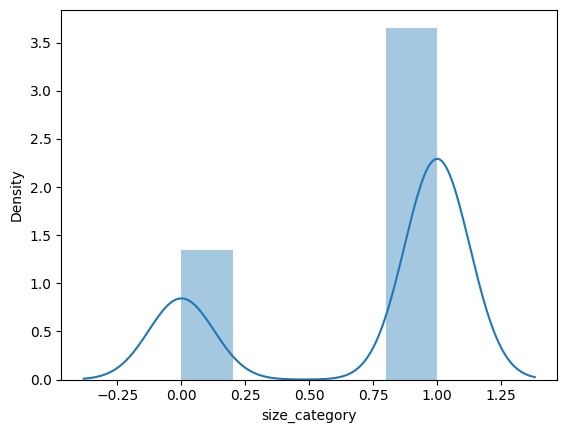

In [10]:
sns.distplot(df.size_category)

# Model building

In [11]:
x = df.iloc[:,:-1]
y= df['size_category']

In [12]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [14]:
sc = StandardScaler()
x = sc.fit_transform(x)
x 

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [16]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=6, activation='relu'))

#Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='binary_crossentropy')

#Fit the data 
ann.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 1.0588
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.9966
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.9428
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8948
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8494
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8114
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7769
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7457
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7172
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6938
Epoch 11/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6730
Epoch 12/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6531
Epoch 13/50
13/13 [==============================

In [17]:
ypred = ann.predict(xtest)
ypred= ypred > 0.5
ypred

4/4 [==============================] - 0s 4ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.28      0.42        29
           1       0.78      0.99      0.87        75

    accuracy                           0.79       104
   macro avg       0.83      0.63      0.65       104
weighted avg       0.81      0.79      0.75       104



In [19]:
ann =Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=25, activation='relu'))

ann.add(Dense(units=1, activation='tanh'))

ann.compile(optimizer='adam', loss='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=60)

Epoch 1/60
13/13 [==============================] - 3s 61ms/step - loss: 3.8183 - val_loss: 3.6787
Epoch 2/60
13/13 [==============================] - 0s 12ms/step - loss: 1.9391 - val_loss: 1.3712
Epoch 3/60
13/13 [==============================] - 0s 14ms/step - loss: 0.9277 - val_loss: 1.0712
Epoch 4/60
13/13 [==============================] - 0s 18ms/step - loss: 0.7033 - val_loss: 1.0314
Epoch 5/60
13/13 [==============================] - 0s 14ms/step - loss: 0.6663 - val_loss: 1.0034
Epoch 6/60
13/13 [==============================] - 0s 16ms/step - loss: 0.6385 - val_loss: 0.9827
Epoch 7/60
13/13 [==============================] - 0s 20ms/step - loss: 0.6158 - val_loss: 0.9667
Epoch 8/60
13/13 [==============================] - 0s 11ms/step - loss: 0.5966 - val_loss: 0.8386
Epoch 9/60
13/13 [==============================] - 0s 7ms/step - loss: 0.5525 - val_loss: 0.8170
Epoch 10/60
13/13 [==============================] - 0s 8ms/step - loss: 0.5366 - val_loss: 0.7989
Epoch 11/60

<Axes: >

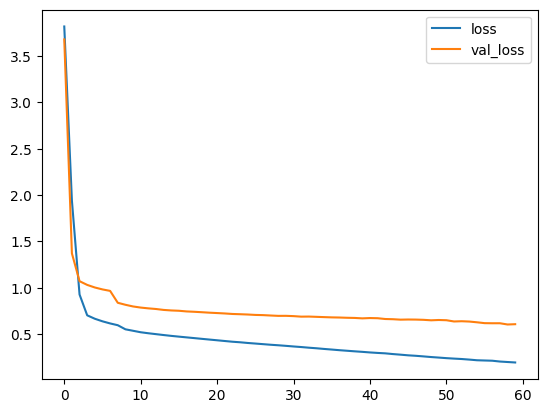

In [20]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping

In [21]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [23]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 30ms/step - loss: 2.6232 - val_loss: 1.3389
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 1.5415 - val_loss: 0.9135
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.9212 - val_loss: 0.7288
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7063 - val_loss: 0.7170
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6341 - val_loss: 0.7162
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6073 - val_loss: 0.7125
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5846 - val_loss: 0.7044
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5682 - val_loss: 0.7000
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5537 - val_loss: 0.7023
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5422 - val_loss: 0.7045
Epoch 1

<Axes: >

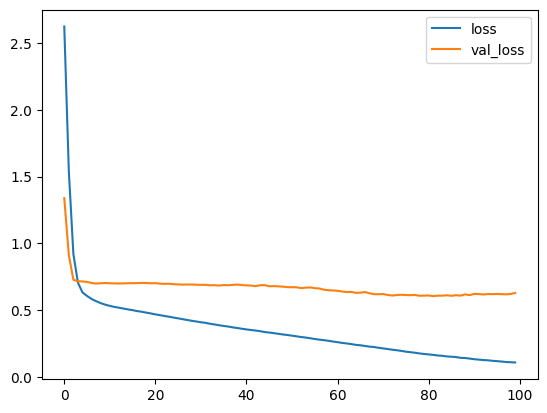

In [24]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Dropout Layer

In [28]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 100)

Epoch 1/100
13/13 [==============================] - 4s 41ms/step - loss: 6.9998 - val_loss: 6.8157
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 5.4974 - val_loss: 4.7782
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 5.4783 - val_loss: 3.1047
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 4.7039 - val_loss: 1.9700
Epoch 5/100
13/13 [==============================] - 0s 21ms/step - loss: 4.8539 - val_loss: 1.1875
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 3.7772 - val_loss: 0.8089
Epoch 7/100
13/13 [==============================] - 0s 16ms/step - loss: 3.7118 - val_loss: 0.7262
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 3.3030 - val_loss: 0.6894
Epoch 9/100
13/13 [==============================] - 0s 22ms/step - loss: 3.3474 - val_loss: 0.6685
Epoch 10/100
13/13 [==============================] - 0s 9ms/step - loss: 2.8268 - val_loss: 0.6607
E

<Axes: >

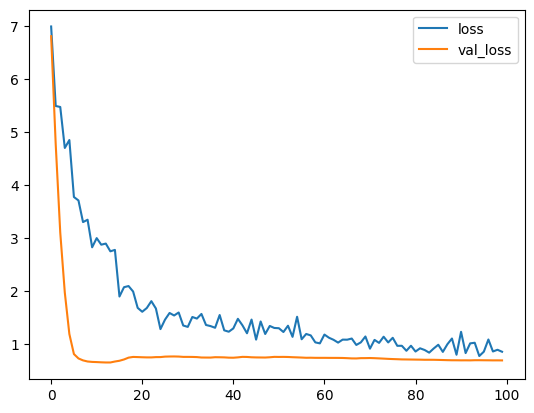

In [29]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Earlystopping and dropout  

In [30]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 51ms/step - loss: 3.6251 - val_loss: 1.7170
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 2.8597 - val_loss: 1.3212
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 2.4457 - val_loss: 1.1215
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 2.4352 - val_loss: 1.0743
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 1.8309 - val_loss: 0.7824
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 1.7398 - val_loss: 0.7623
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 1.6824 - val_loss: 0.7493
Epoch 8/100
13/13 [==============================] - 0s 14ms/step - loss: 1.5148 - val_loss: 0.7374
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 1.6971 - val_loss: 0.7316
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 1.5337 - val_loss: 0.7245
Epoch 1

<Axes: >

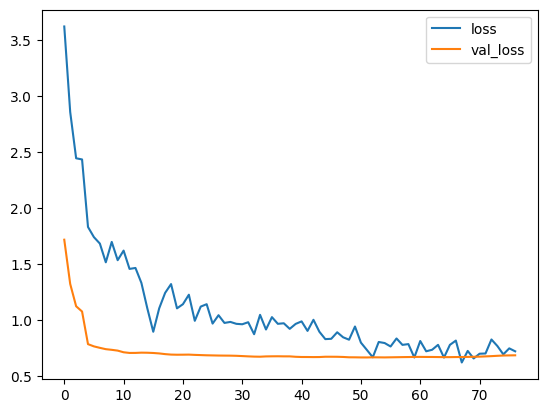

In [31]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

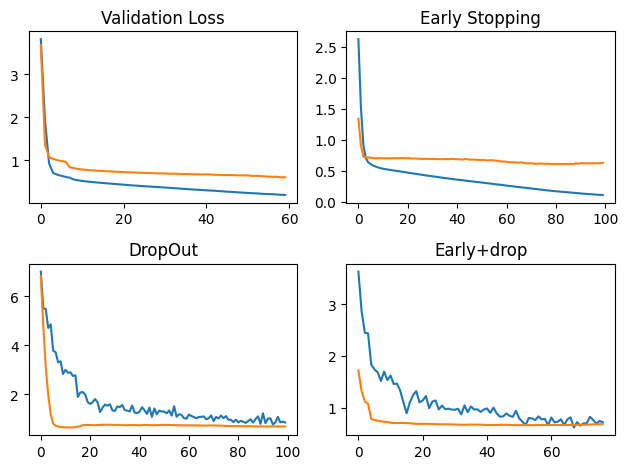

In [32]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()

# GasTurbines DataSet

In [33]:
df= pd.read_csv('gas_turbines.csv')
df.head(6)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409


In [34]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [35]:
df['TEY'].nunique()

4207

In [36]:
df.shape

(15039, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [38]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [39]:
x=df.columns
x 

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [40]:
sc= StandardScaler()

df=sc.fit_transform(df)
df

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [41]:
df=pd.DataFrame(data=df, columns=x)
df 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [42]:
x=df.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
y=df['TEY']

In [43]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [45]:
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=143)

In [47]:
ytest

13942   -0.066868
9254    -0.059287
3517    -0.126884
2844    -0.026436
9402    -0.088979
           ...   
1483    -0.172369
8090    -0.033385
13984   -1.381528
12117    0.832736
2069     1.307808
Name: TEY, Length: 3008, dtype: float64

In [48]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=30, activation='sigmoid'))
ann.add(Dense(units=20, activation='relu'))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='mean_squared_error')

#Fit the data 
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
376/376 [==============================] - 3s 4ms/step - loss: 0.1785 - val_loss: 0.0065
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 4/50
376/376 [==============================] - 1s 4ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 8/50
376/376 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 9/50
376/376 [==============================] - 2s 7ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 10/50
376/376 [==============================] - 2s 5ms/step - loss: 0.0026 - val_loss: 0.0025

<Axes: >

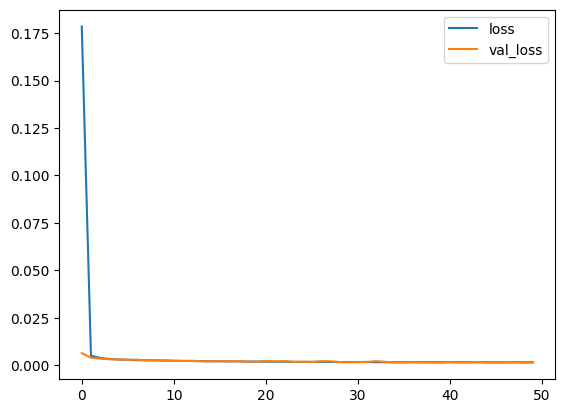

In [49]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [50]:
ypred = ann.predict(xtest)
ypred

94/94 [==============================] - 0s 3ms/step


array([[-0.01996745],
       [-0.09528018],
       [-0.15505843],
       ...,
       [-1.349367  ],
       [ 0.8153245 ],
       [ 1.2086685 ]], dtype=float32)

In [51]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
ann =Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='tanh'))

ann.compile(optimizer='adam', loss='mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=45)

Epoch 1/45
376/376 [==============================] - 3s 4ms/step - loss: 0.2650 - val_loss: 0.1421
Epoch 2/45
376/376 [==============================] - 1s 4ms/step - loss: 0.1412 - val_loss: 0.1365
Epoch 3/45
376/376 [==============================] - 2s 4ms/step - loss: 0.1378 - val_loss: 0.1346
Epoch 4/45
376/376 [==============================] - 1s 2ms/step - loss: 0.1364 - val_loss: 0.1338
Epoch 5/45
376/376 [==============================] - 1s 2ms/step - loss: 0.1356 - val_loss: 0.1332
Epoch 6/45
376/376 [==============================] - 1s 2ms/step - loss: 0.1351 - val_loss: 0.1329
Epoch 7/45
376/376 [==============================] - 1s 2ms/step - loss: 0.1348 - val_loss: 0.1326
Epoch 8/45
376/376 [==============================] - 1s 2ms/step - loss: 0.1345 - val_loss: 0.1323
Epoch 9/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1343 - val_loss: 0.1321
Epoch 10/45
376/376 [==============================] - 1s 3ms/step - loss: 0.1341 - val_loss: 0.1319

<Axes: >

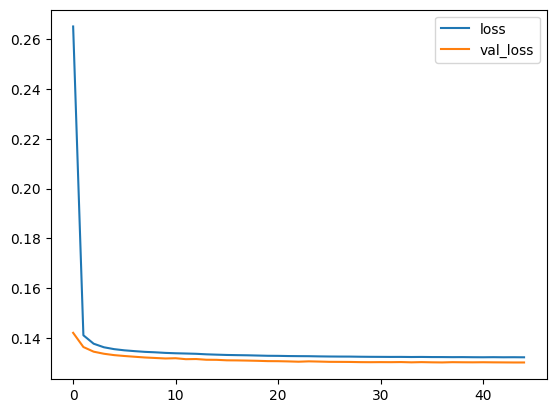

In [53]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early stopping

In [54]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [55]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam', loss = 'mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=50)

Epoch 1/50
376/376 [==============================] - 3s 3ms/step - loss: 0.1985 - val_loss: 0.1384
Epoch 2/50
376/376 [==============================] - 2s 4ms/step - loss: 0.1385 - val_loss: 0.1361
Epoch 3/50
376/376 [==============================] - 2s 6ms/step - loss: 0.1367 - val_loss: 0.1345
Epoch 4/50
376/376 [==============================] - 2s 4ms/step - loss: 0.1359 - val_loss: 0.1337
Epoch 5/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1354 - val_loss: 0.1332
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1351 - val_loss: 0.1330
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1347 - val_loss: 0.1326
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1345 - val_loss: 0.1325
Epoch 9/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1342 - val_loss: 0.1320
Epoch 10/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1341 - val_loss: 0.1318

<Axes: >

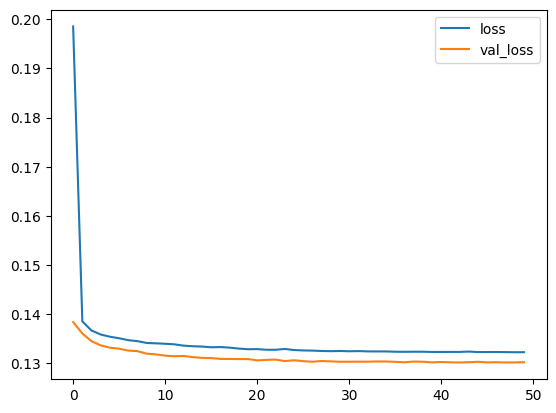

In [56]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop out layer

In [57]:
ann = Sequential()

ann.add(Dense(units=35, activation='relu'))
ann.add(Dropout(rate=0.45))

ann.add(Dense(units=25, activation='relu'))
ann.add(Dropout(rate=0.4))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 50)

Epoch 1/50
376/376 [==============================] - 2s 3ms/step - loss: 0.2929 - val_loss: 0.1434
Epoch 2/50
376/376 [==============================] - 1s 3ms/step - loss: 0.1621 - val_loss: 0.1378
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1503 - val_loss: 0.1377
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1449 - val_loss: 0.1373
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1441 - val_loss: 0.1367
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1429 - val_loss: 0.1366
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1421 - val_loss: 0.1362
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1417 - val_loss: 0.1361
Epoch 9/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1411 - val_loss: 0.1353
Epoch 10/50
376/376 [==============================] - 1s 4ms/step - loss: 0.1408 - val_loss: 0.1348

<Axes: >

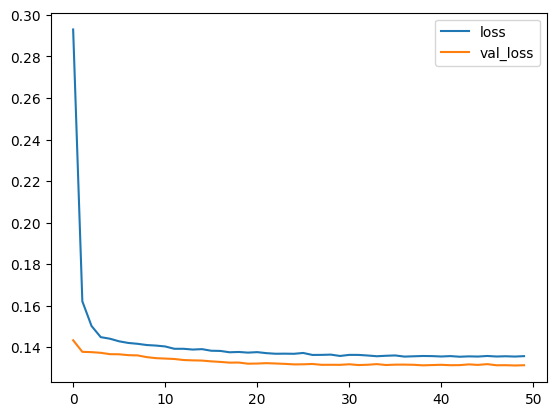

In [58]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early stopping and dropout layer

In [59]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 55)

Epoch 1/55
376/376 [==============================] - 2s 3ms/step - loss: 0.7439 - val_loss: 0.5484
Epoch 2/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5843 - val_loss: 0.5489
Epoch 3/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5760 - val_loss: 0.5494
Epoch 4/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5728 - val_loss: 0.5493
Epoch 5/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5721 - val_loss: 0.5495
Epoch 6/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5711 - val_loss: 0.5490
Epoch 7/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5701 - val_loss: 0.5489
Epoch 8/55
376/376 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.5486
Epoch 9/55
376/376 [==============================] - 1s 3ms/step - loss: 0.5692 - val_loss: 0.5481
Epoch 10/55
376/376 [==============================] - 1s 4ms/step - loss: 0.5689 - val_loss: 0.5482

<Axes: >

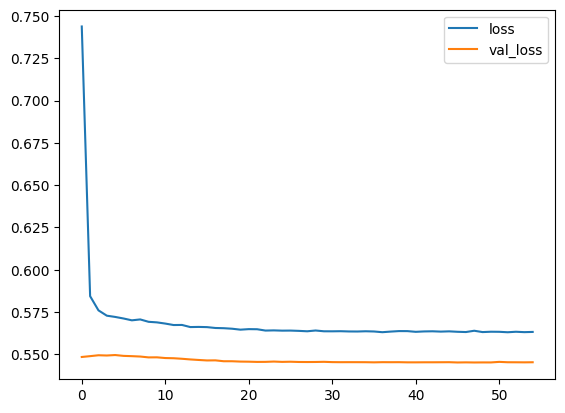

In [60]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

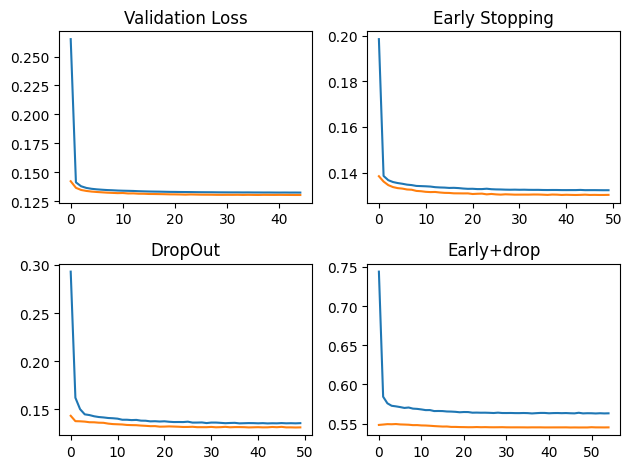

In [61]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()